In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# classificadores
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

# base de dados
from sklearn.datasets import load_wine

############ treino ############
def fitModel(algorithm, dataset):
    #X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], random_state=0)
    if algorithm == "decision_tree":
        # fit model using decision tree
        model = DecisionTreeClassifier(random_state=0)
    elif algorithm == "naive_bayes":
        model = GaussianNB()
    elif algorithm == "random_forest":
        model = RandomForestClassifier(n_estimators=10)
    elif algorithm == "mlp":
        model = MLPClassifier(solver='lbfgs', alpha=0.7, hidden_layer_sizes=(5, 2), random_state=1)
    model.fit(train, train_labels)
    y = model.predict(train)
    print(algorithm, ":", model.score(test, test_labels))

# importando dados
data = load_wine()

# organizando dados
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

# Analisando nossos dados
#print(label_names)
#print(labels)
#print(feature_names)
#print(features)

#print(feature_names)

# verificando padrão da classe dos atributos
#n = len(feature_names)
#i = 0
#while (i < n):
#    print('\t',feature_names[i],'->',features[i])
#    print('\n')
#    i+=1

In [2]:
# Dividir nossos dados
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.35,random_state=0)

## training and testing models
fitModel(algorithm="decision_tree", dataset=data)
fitModel(algorithm="naive_bayes", dataset=data)
fitModel(algorithm="random_forest", dataset=data)

decision_tree : 0.9365079365079365
naive_bayes : 0.9365079365079365
random_forest : 0.9841269841269841


In [3]:
# funcao plot matriz de confusao
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [4]:
#gnb = GaussianNB()
tree = DecisionTreeClassifier(random_state=0)
#rfc = RandomForestClassifier(n_estimators=10)

model = tree.fit(train, train_labels)

# Fazer previsões
preds = tree.predict(test)

Confusion matrix, without normalization
[[19  2  0]
 [ 0 23  2]
 [ 0  0 17]]
Normalized confusion matrix
[[0.9  0.1  0.  ]
 [0.   0.92 0.08]
 [0.   0.   1.  ]]


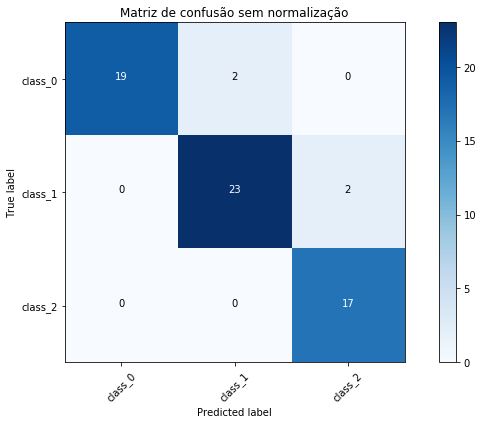

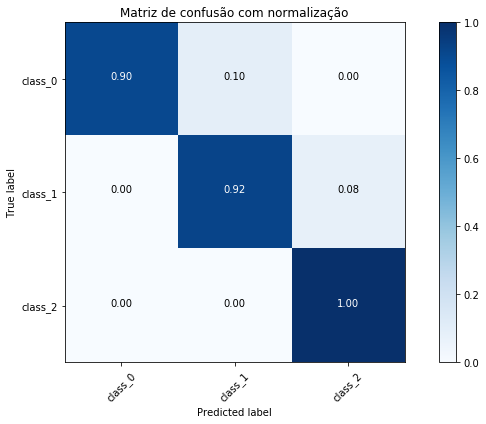

In [5]:
# Computar matriz de confusao
cnf_matrix = confusion_matrix(test_labels, preds)
np.set_printoptions(precision=2)


# Plotar matriz de confusao sem normalização
plt.figure(figsize=(10,6))
plot_confusion_matrix(cnf_matrix, classes=label_names,
                      title='Matriz de confusão sem normalização')

# Plotar matriz de confusao com normalização
plt.figure(figsize=(10,6))
plot_confusion_matrix(cnf_matrix, classes=label_names, normalize=True,
                      title='Matriz de confusão com normalização')

plt.show()

In [6]:
models=[DecisionTreeClassifier(random_state=0),RandomForestClassifier(n_estimators=10),GaussianNB()]
model_names=['Arvore Decisão','Floresta aleatório','Naive Bayes']

acc = []
d = {}

for model in range(len(models)):
    clf = models[model]
    clf.fit(train,train_labels)
    pred = clf.predict(test)
    acc.append(accuracy_score(pred,test_labels))
     
d={'Modelo':model_names,'Acurácia':acc}
d

{'Modelo': ['Arvore Decisão', 'Floresta aleatório', 'Naive Bayes'],
 'Acurácia': [0.9365079365079365, 0.9523809523809523, 0.9365079365079365]}

In [7]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelo,Acurácia
0,Arvore Decisão,0.936508
1,Floresta aleatório,0.952381
2,Naive Bayes,0.936508


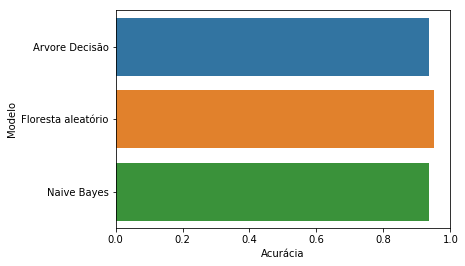

In [8]:
sns.barplot(y='Modelo',x='Acurácia',data=acc_frame)